In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pickle

%matplotlib inline

# Load the Boston dataset

In [8]:
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()
print(type(boston))
print(boston.keys())
print(boston.DESCR)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of a

e:\OneNeuron\Boston House price\EndtoEnd_project\boston-house-pricing\boston_env1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alte

In [11]:
dataset = pd.DataFrame(boston.data,columns=boston.feature_names)
dataset['Price'] = boston.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Null analysis

In [12]:
dataset.isnull().mean()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
Price      0.0
dtype: float64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Stats summary

In [14]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


# Exploratory data analysis

In [15]:
dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

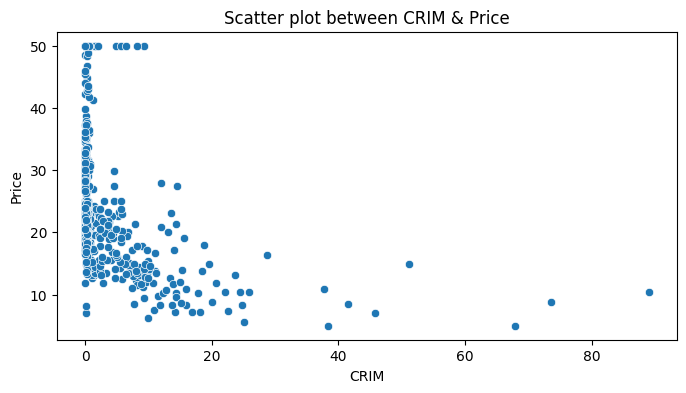

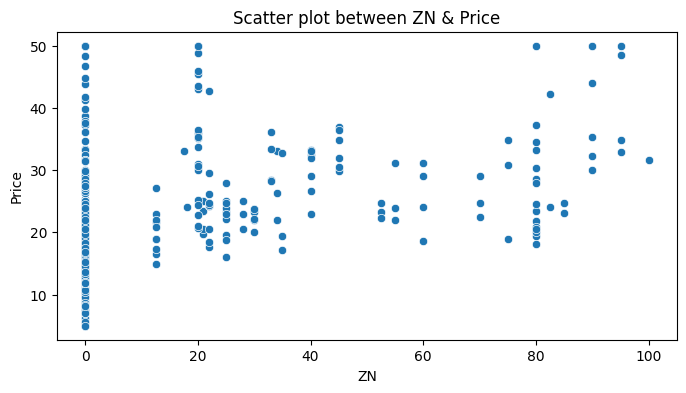

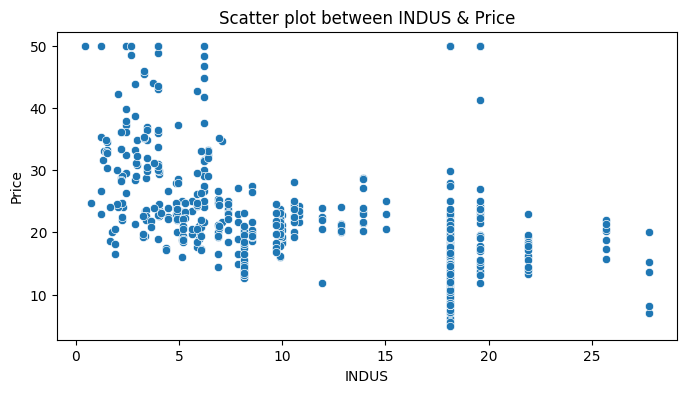

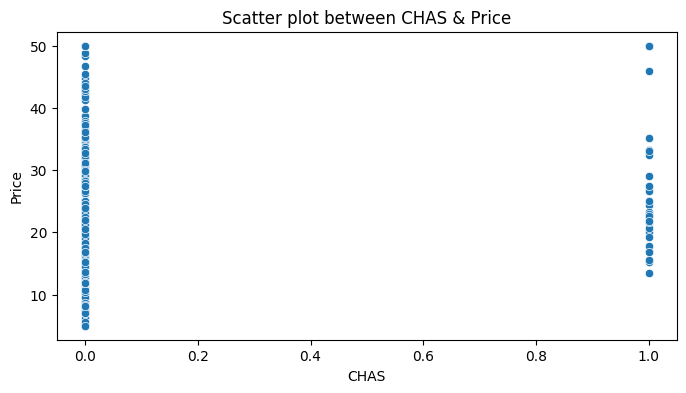

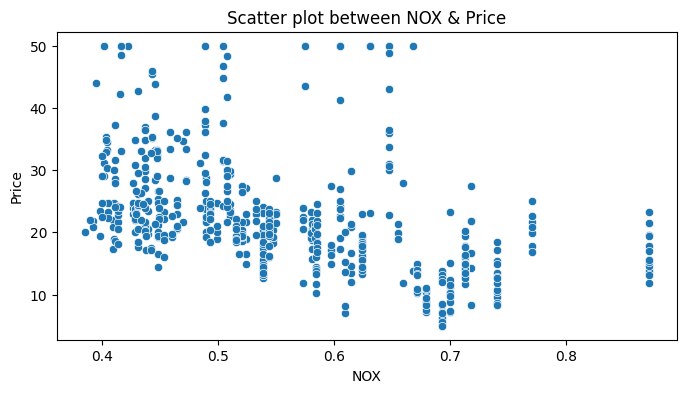

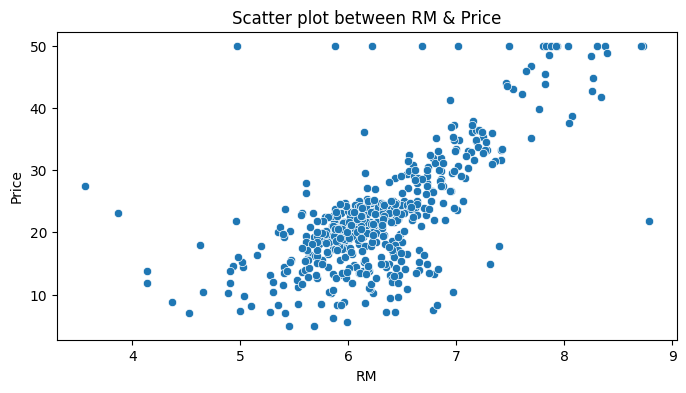

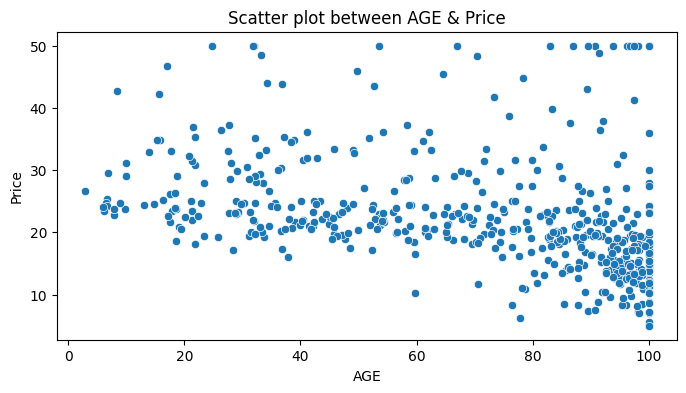

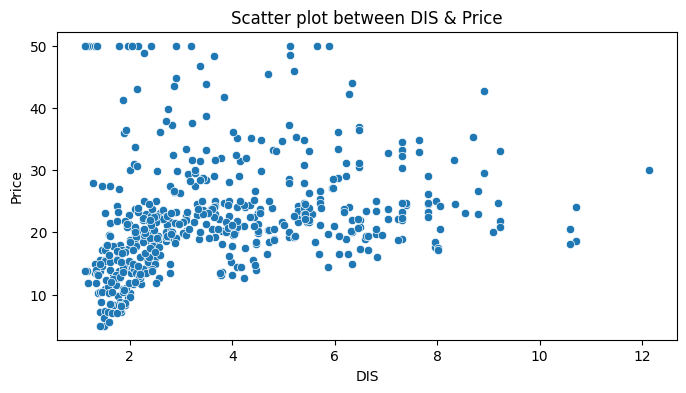

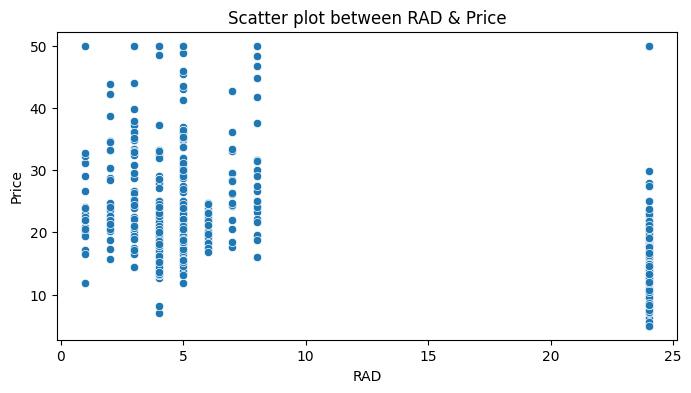

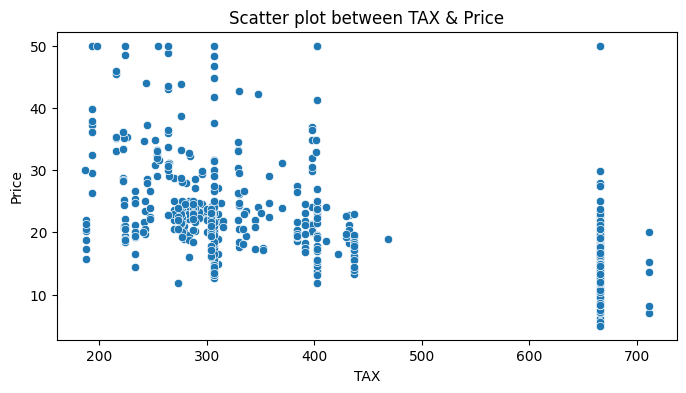

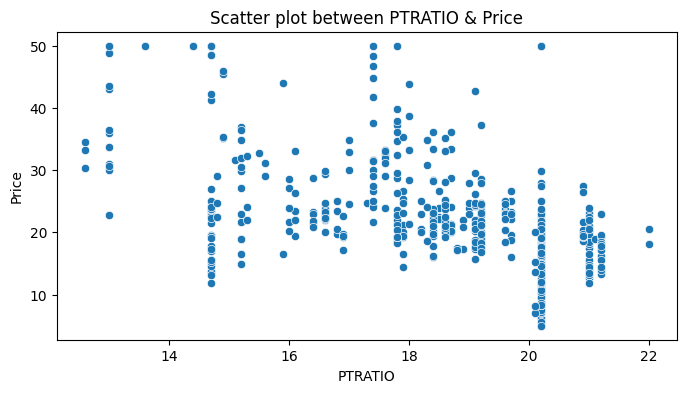

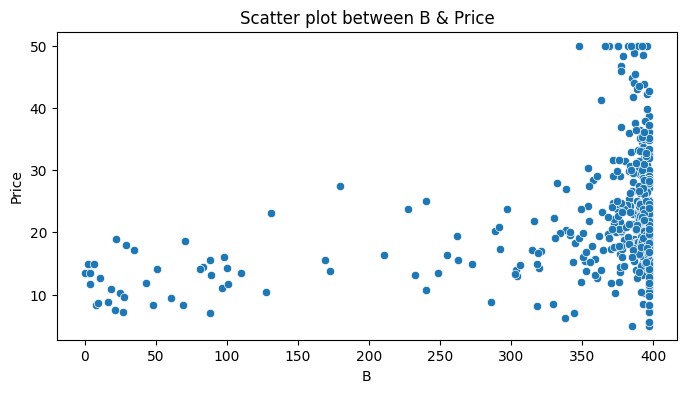

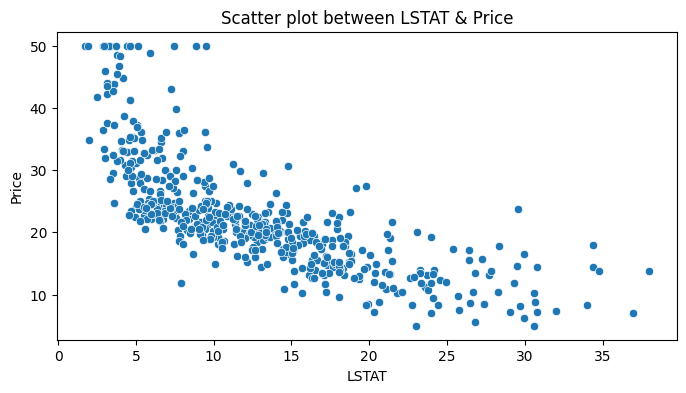

In [16]:
for col in dataset.columns:
    if col != 'Price':
        
        plt.figure(figsize=(8,4))
        sns.scatterplot(data=dataset, x=col, y='Price')
        plt.title('Scatter plot between {} & Price'.format(col))
        plt.show()
        print('\n')
        

- CRIM     per capita crime rate by town <br>
Crime rate increases Price decreases 
<br>
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft. <br>
Minimum threshold changes as ZN increases
<br>
- INDUS    proportion of non-retail business acres per town <br>
Indus increases cost decreases
<br>
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
when not river bound, price varies from low segment to high segment. When river bound, price is in certain range only
<br>

- NOX      nitric oxides concentration (parts per 10 million)<br>
NOX increases price decreases
<br>

- RM       average number of rooms per dwelling<br>
Linear relationship - Room increases price increases
<br>

- AGE      proportion of owner-occupied units built prior to 1940<br>
Linear relationship - Age increases price decreases
<br>

- DIS      weighted distances to five Boston employment centres<br>
No good signal
<br>

- RAD      index of accessibility to radial highways<br>
No good signal
<br>

- TAX      full-value property-tax rate per $10,000<br>
Decreasing trend - as tax increases price decreases
<br>

- PTRATIO  pupil-teacher ratio by town<br>
Small decreasing trend - as ratio increases (when teacher is less) then price decreases
<br>

- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
As 'B' increases, price increases
<br>

- LSTAT    % lower status of the population<br>
Linear relationship - LSTAT increases price decreases
<br>



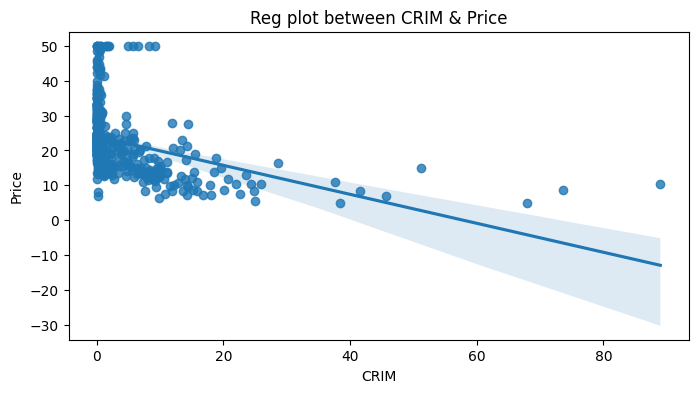

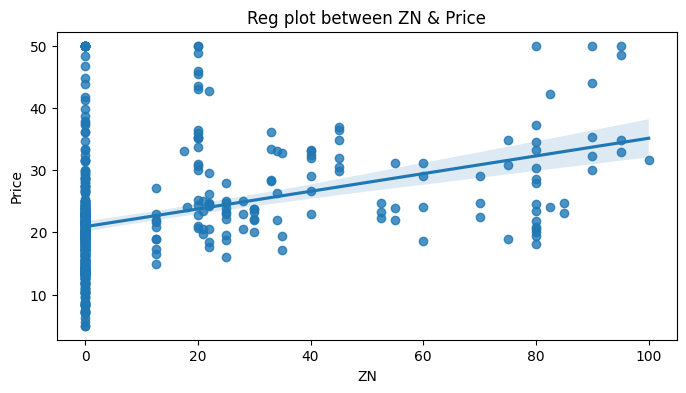

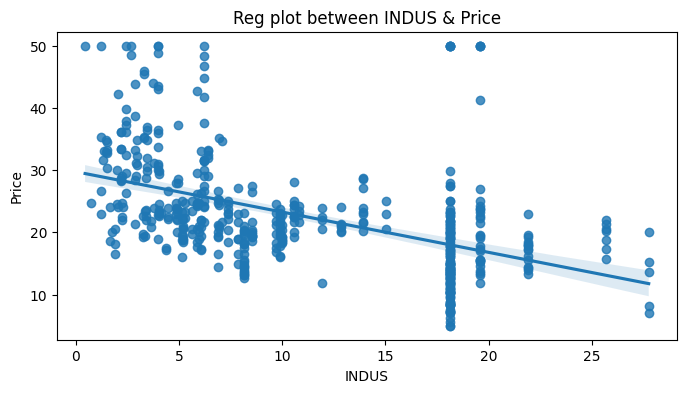

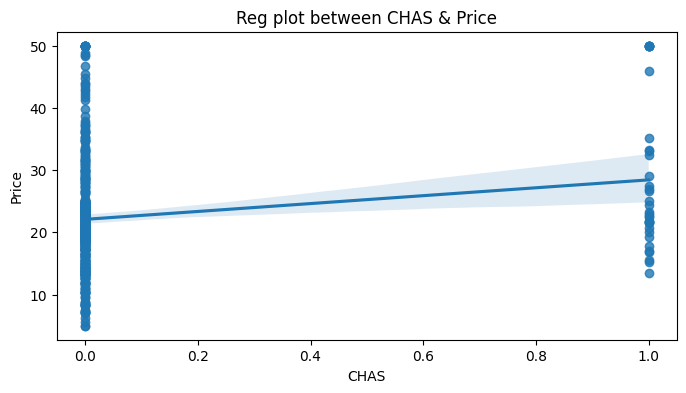

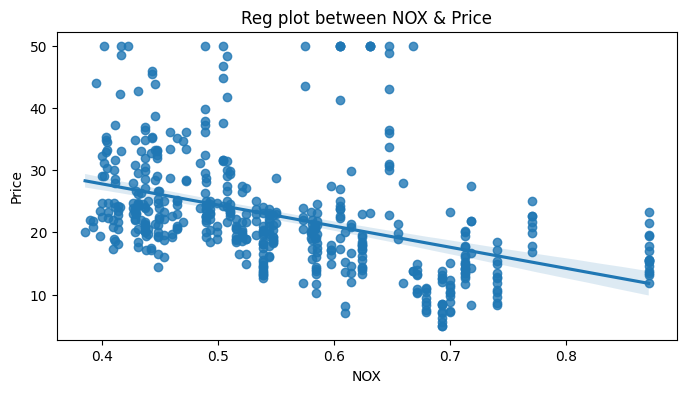

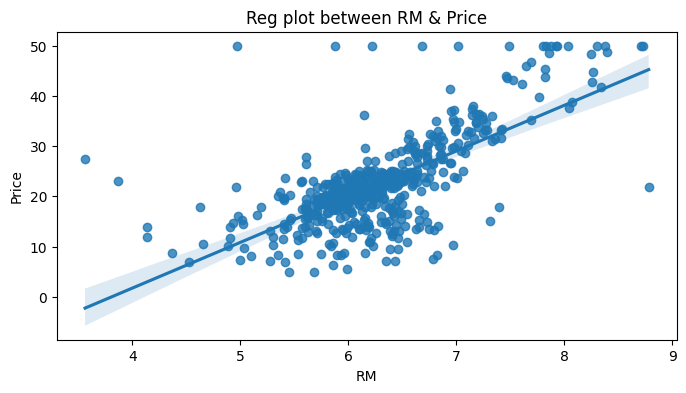

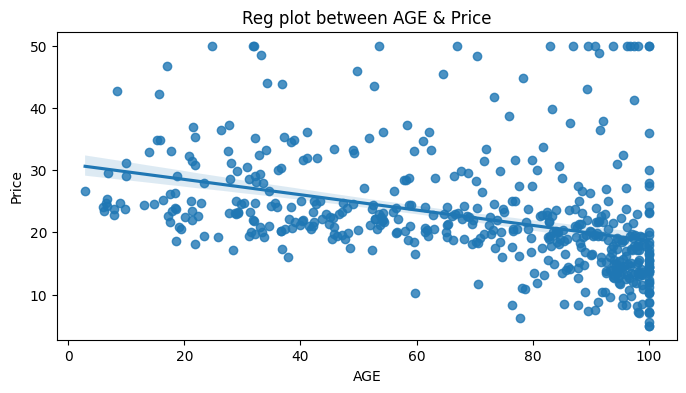

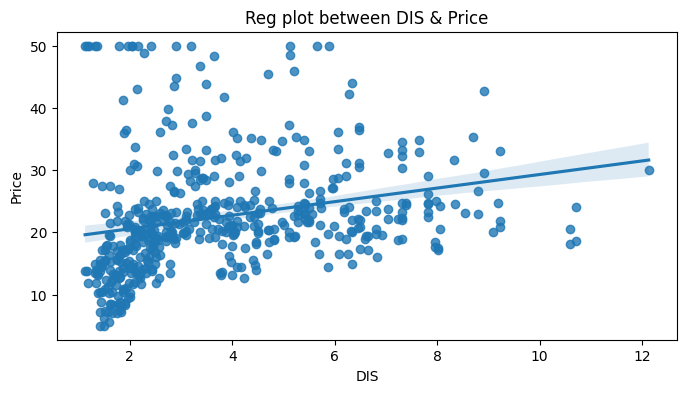

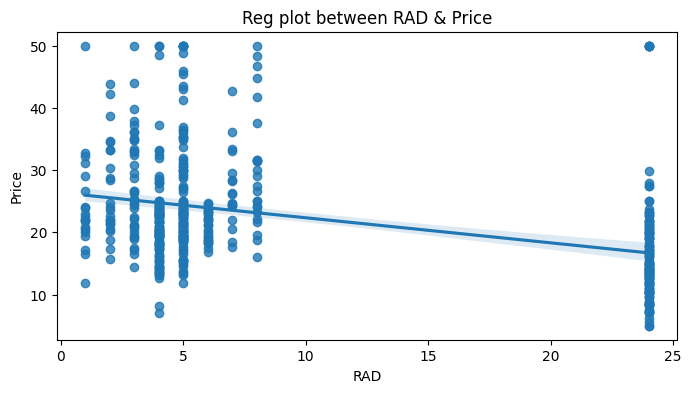

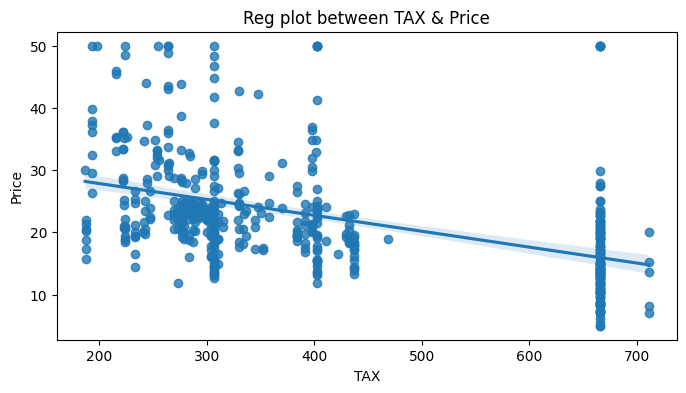

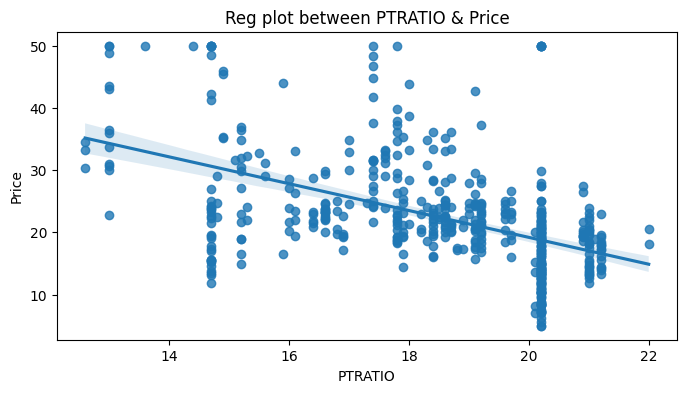

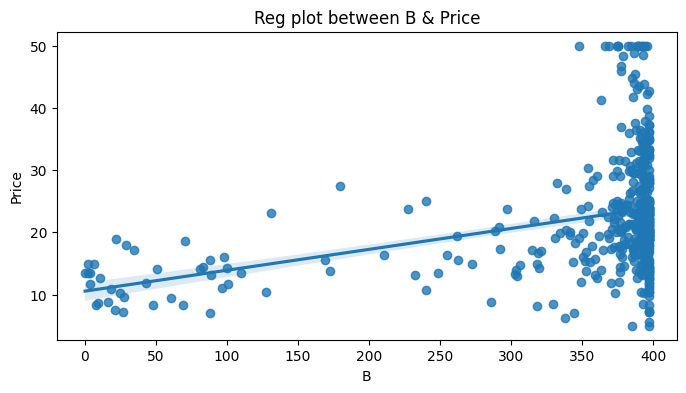

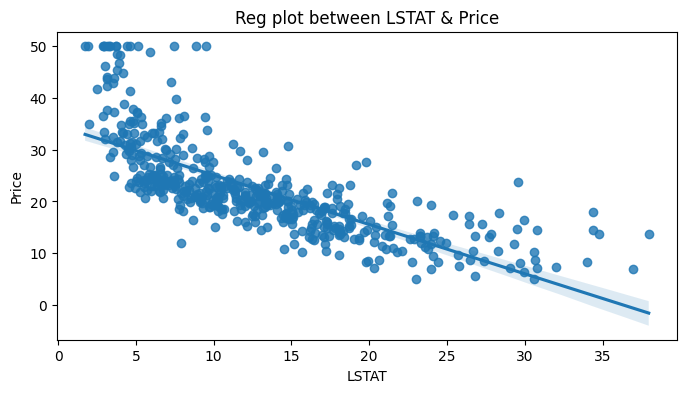

In [17]:
for col in dataset.columns:
    if col != 'Price':
        
        plt.figure(figsize=(8,4))
        sns.regplot(data=dataset, x=col, y='Price')
        plt.title('Reg plot between {} & Price'.format(col))
        plt.show()
        print('\n')

# Correlation

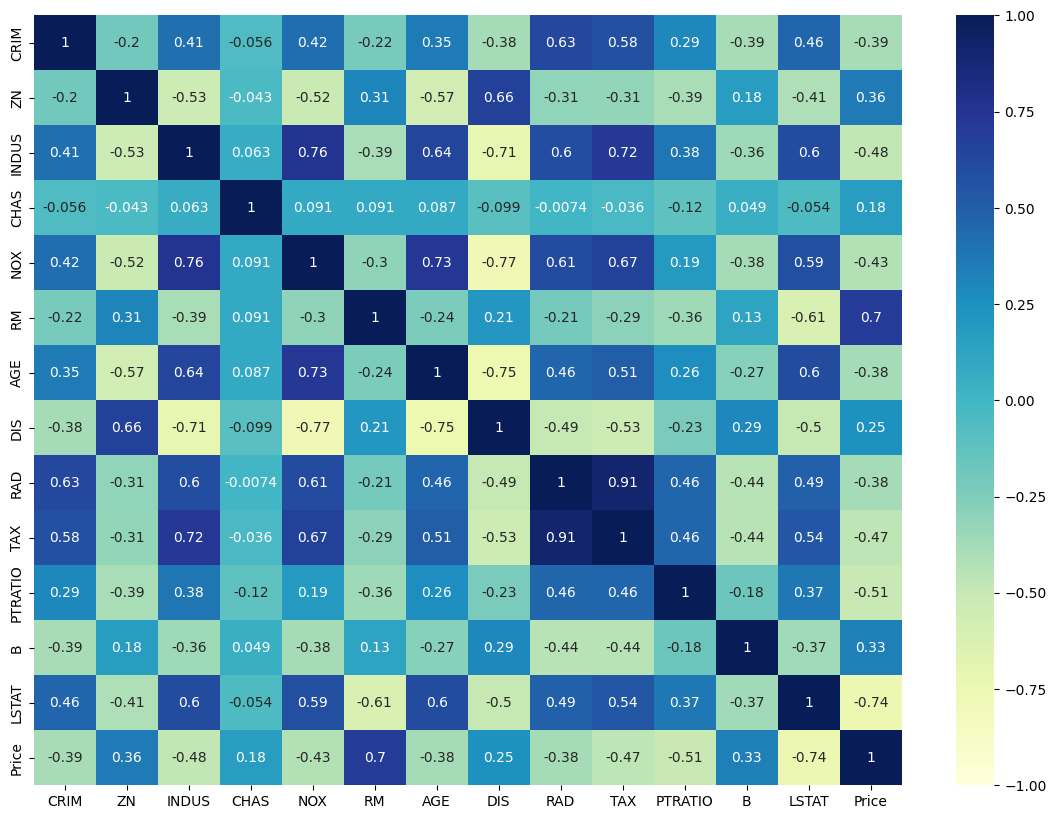

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(dataset.corr(), vmin=-1, vmax=+1, annot=True, cmap='YlGnBu')
plt.show()

* RAD & TAX are highly correlated - 91% <br>
* Preferable to have TAX and drop RAD <br>
* INDUS & NOX are 76% correlated <br>
* INDUS & TAX are 72% correlated <br>
* NOX & AGe are 73% correlated


<b> Number of rooms & LSTAT have good linear relationship with the target Price <b>

# Independent & dependent features

In [19]:
X = dataset.drop('Price', axis=1)
Y = dataset['Price']

print(X.shape, Y.shape)

X.head()
Y.head()

(506, 13) (506,)


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=17)
print('SHape of X_train is {}'.format(X_train.shape))
print('SHape of X_test  is {}'.format(X_test.shape))
print('SHape of y_train is {}'.format(y_train.shape))
print('SHape of y_test  is {}'.format(y_test.shape))

SHape of X_train is (404, 13)
SHape of X_test  is (102, 13)
SHape of y_train is (404,)
SHape of y_test  is (102,)


# Standard Scalling

In [21]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train_std, columns=X_train.columns)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,7.649920,-0.464310,0.965387,-0.283221,1.059951,-0.466808,1.109652,-0.928690,1.625216,1.487643,0.795587,-3.753549,1.090369
1,-0.418349,3.633235,-1.276972,-0.283221,-1.244108,2.449923,-1.338264,0.697236,-0.657772,-1.122251,-1.709436,0.380607,-1.381982
2,-0.414501,0.959048,-1.349682,-0.283221,-0.754200,1.329292,-1.007562,0.159740,-0.315323,-1.134060,-0.024239,0.415196,-0.817550
3,0.702533,-0.464310,0.965387,-0.283221,0.490290,-0.146628,0.991030,-0.748266,1.625216,1.487643,0.795587,0.260704,0.729412
4,-0.357415,-0.464310,-0.765098,-0.283221,-0.447459,2.875426,0.149896,0.069699,-0.201174,-0.632157,-0.479697,0.329330,-1.439122


In [22]:
X_test_std = sc.transform(X_test)
X_test = pd.DataFrame(X_test_std, columns=X_test.columns)
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.412969,1.476632,-1.166454,-0.283221,-1.060940,0.631355,-1.377805,1.365085,-0.543622,-0.094827,-1.481707,0.371324,-1.129730
1,-0.419351,1.907953,-1.339503,-0.283221,-1.481613,0.229725,-1.338264,1.770904,-1.000220,-0.673491,-1.436161,0.426689,-0.636375
2,-0.015229,-0.464310,0.965387,-0.283221,1.357927,0.121594,0.692679,-0.553767,1.625216,1.487643,0.795587,0.390331,0.258355
3,-0.362722,-0.464310,-0.765098,-0.283221,-0.473751,3.420295,0.498571,-0.393254,-0.201174,-0.632157,-0.479697,0.286121,-1.138092
4,-0.264156,-0.464310,1.180607,-0.283221,2.742641,0.309770,1.109652,-0.946689,-0.543622,-0.065303,-1.709436,0.090630,-0.753442


### Store the standardizer object to be used for inferencing

In [23]:
pickle.dump(sc, open('std_scaler.pkl', 'wb'))

# Model

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Train accuracy is {}'.format(lr.score(X_train, y_train)))
print('Test  accuracy is {}'.format(lr.score(X_test, y_test)))

Train accuracy is 0.7465759348414512
Test  accuracy is 0.6995791930736399


In [17]:
print(lr.coef_)
print(lr.intercept_)

[-0.97030063  1.28171417  0.46060807  0.71737452 -1.96045046  2.5768888
 -0.00819754 -2.88325166  2.87558264 -2.452065   -2.13831572  0.68045065
 -4.0330578 ]
22.540594059405947


In [18]:
y_pred = lr.predict(X_test)
y_pred

array([30.52230881, 27.67746087, 19.99197451, 39.39611841, 26.03684316,
       17.9812617 , 37.36092479, 22.24942889,  3.02096849, 30.84724837,
       16.75610736, 20.07554677, 22.28030366, 16.8535575 , 22.45093937,
       23.21001591, 24.46794122, 14.59886091, 15.35696389, 19.20113905,
       32.76979116, 28.76665352, 15.82359836, 19.48877099, 24.85034168,
       34.28733668, 17.50579673,  9.49262461, 17.3668717 , 26.24412404,
       25.3253591 , 20.240918  , 22.40426345, 21.91522115, 20.98993928,
        8.52819767, 35.03397374, 12.75448218, 20.22823168, 35.25314228,
        8.90854019, 20.75678251, 27.57738526, 20.60831373, 20.01621232,
       13.41797784, 31.78675416, 29.14002594, 20.60311845, 17.90360559,
       27.5731851 , 21.8810291 , 28.36882015, 22.80006725, 19.42651264,
       13.44816009, 17.72871348, 25.44356748, 37.09197969, 27.07066498,
       23.82644078, 22.22686309, 23.69853615, 20.14537434, 14.51735913,
       25.40328185, 28.69152634, 32.58106746, 32.25548777, 27.50

# Plot the residuals

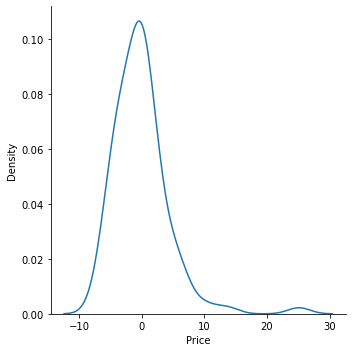

In [35]:
residuals = y_test - y_pred
sns.displot(residuals, kind='kde')

* Normalized distribution in residuals <br>
* -10 to +10 is the error ranges mostly

# Performance metrics

In [45]:
print('MAE :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE : 3.009347877447994
MSE : 19.813516840300505
RMSE: 4.451237675107959


<b> Every prediction can have a range of error of +/- $4.5K <b>

<b>
R2 & Adjusted R2 <br>

R^2 = 1 - SSR/SST <br>
R^2 : Coeeficient of determination SSR <br>
SSR : Sum of squares of residuals <br>
SSt : Total sum of squares <br>
    
Adjusted R^2 : 1 = [(1-R2)*(n-1)/(n-k-1)] <br>
n : # of observations <br>
k : # of predictors

In [54]:
print('R2      :', metrics.r2_score(y_test, y_pred))

n = y_test.shape[0]
k = X_test.shape[1]
Adj_R2 = 1 - (((1 - metrics.r2_score(y_test, y_pred)) * (n-1))/(n-k-1))
print('Adj_R2  :', Adj_R2)

R2      : 0.6995791930736399
Adj_R2  : 0.6551988465958822


# New data prediction

In [61]:
#New data point to predict
print(boston.data[0])
print(boston.data[0].shape)

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
(13,)


In [66]:
test_point = boston.data[0].reshape(1,-1)
print(test_point)
print(test_point.shape)

[[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
  4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]]
(1, 13)


In [67]:
# standardize the test_point
test_point = sc.transform(test_point)
test_point

array([[-0.41986003,  0.31206679, -1.3307775 , -0.28322059, -0.17577485,
         0.40104938, -0.14126563,  0.19308781, -1.00021968, -0.69710956,
        -1.43616072,  0.45077998, -1.08931389]])

In [69]:
#Make predictions
lr.predict(test_point)

array([29.95842572])

# Pickling the model file for deployment

In [71]:
pickle.dump(lr, open('lr_model.pkl', 'wb'))

In [73]:
ls

 Volume in drive E is New Volume
 Volume Serial Number is EEFB-5F97

 Directory of E:\OneNeuron\Boston House price

31-08-2022  18:38    <DIR>          .
31-08-2022  18:38    <DIR>          ..
31-08-2022  07:31    <DIR>          .ipynb_checkpoints
31-08-2022  18:37           949,395 Boston House Price.ipynb
31-08-2022  18:38               658 lr_model.pkl
               2 File(s)        950,053 bytes
               3 Dir(s)  35,488,509,952 bytes free


### Load the model again

In [75]:
pickled_model = pickle.load(open('lr_model.pkl', 'rb'))
pickled_model

LinearRegression()

In [76]:
pickled_model.predict(test_point)

array([29.95842572])